# Variogram analysis and kriging for data in 1D

Interpolate a data set in 1D, using simple or ordinary kriging. Starting from a data set in 1D, the following is done:
- basic exploratory analysis: variogram cloud / experimental variogram
- fitting a covariance / variogram model, and cross-validation (LOO error)
- interpolation by ordinary kriging, simple kriging (and simulation)

**Note:** most of the tools illustrated below can also be used for data in 2D or 3D assuming omni-directional covariance / variogram models.

## Import what is required

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import time

# import from package 'geone'
from geone import grf
import geone.covModel as gcm
import geone.img as img

### Remark
The matplotlib figures can be visualized in *interactive* mode:
- `%matplotlib notebook`: enable interactive mode
- `%matplotlib inline`: disable interactive mode

## Preparation - build a data set in 1D
A data set in 1D is extracted from a Gaussian random field generated based on a known covariance model, called the *reference model* which will be considered as unknown further.

Define the *reference* covariance model in 1D (class `covModel1D` from `geone.covModel`, see jupyter notebook `ex_grf_1d`).

In [2]:
cov_model_ref = gcm.CovModel1D(elem=[
    ('spherical', {'w':2.5, 'r':1.2}),   # elementary contribution
    ], name='ref model')

In [3]:
cov_model_ref

Covariance model 1D: (Name = ref model)
   1 elementary contribution(s)
   Elementary contribution 0: type : spherical
      parameters:  w = 2.5,  r = 1.2

Generate a gaussian random field in 1D (see function `grf1D` from `geone.grf`), and extract data points:
- `n`: number of data points, 
- `x`: location of data points (1-dimensional array of length `n`),
- `v`: values at data points (1-dimensional array of length `n`).

In [4]:
x = np.array([1.0000, 1.7000, 2.0000, 2.4000, 3.0000, 3.2000, 3.8000, 4.0000, 5.0000, 5.5000])
v = np.array([11.7000,  13.5000, 12.6000, 10.2000, 10.3000, 10.5000, 10.2000, 12.0000, 13.5000, 12.4000])
n = len(x)

In [5]:
# Simulation grid (domain)
nx = 1000 # number of cells
dx = 0.01  # cell unit
ox = 0.0  # origin
# xmin, xmax = ox, ox + nx*dx # bounds of the simulation domain

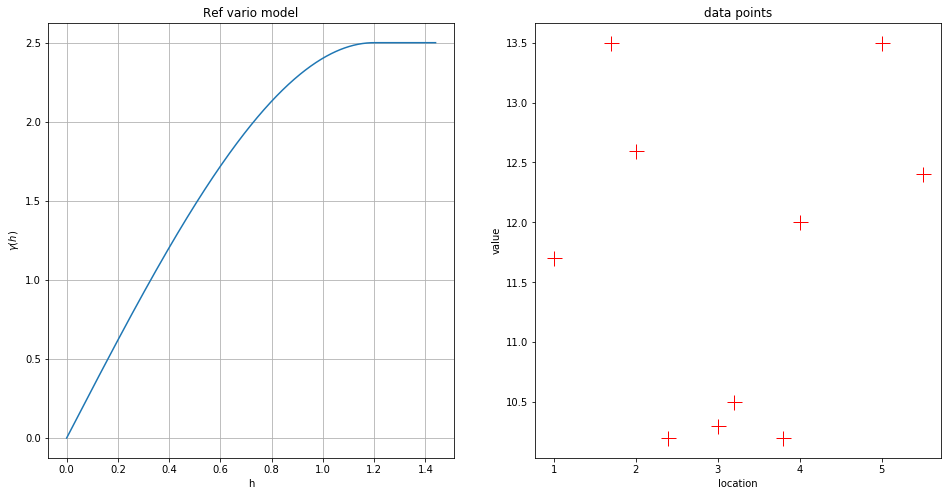

In [6]:
# Plot reference variogram model, reference simulation and data points
plt.subplots(1,2,figsize=(16,8))
plt.subplot(1,2,1)
cov_model_ref.plot_model(vario=True)
plt.title('Ref vario model')

plt.subplot(1,2,2)
plt.plot(x, v, 'r+', markersize=15)
plt.xlabel('location')
plt.ylabel('value')
plt.title('data points')
plt.show()

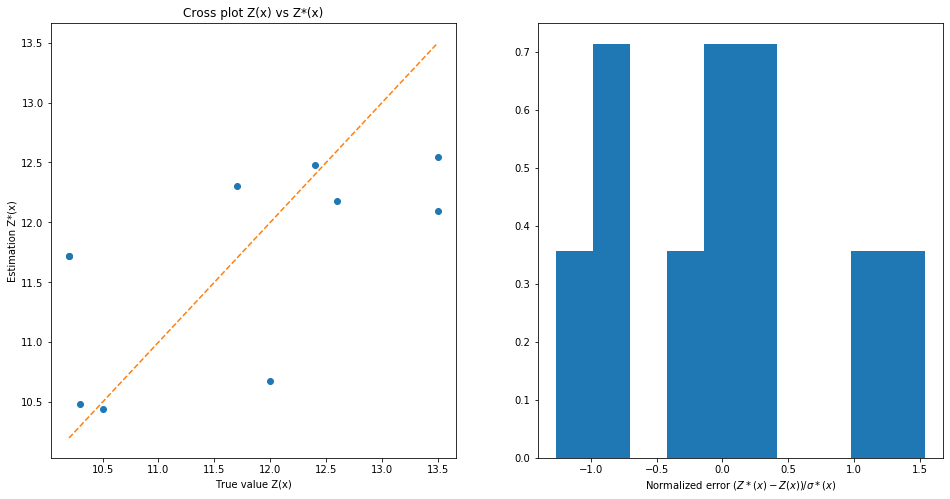

Test (1. normal law test for mean of normalized error) passed: True
Test (2. Chi2 test for sum of squares of normalized error) passed: True


In [7]:
# Interpolation by ordinary kriging
cv_est, cv_std, test_normal, test_chi2 = gcm.cross_valid_loo(x, v, cov_model_ref, make_plot=True, figsize=(16,8))
plt.show()
print('\
Test (1. normal law test for mean of normalized error) passed: {}\n\
Test (2. Chi2 test for sum of squares of normalized error) passed: {}'.format(test_normal, test_chi2))

In [8]:
cv_est, cv_std, (cv_est - v)

(array([12.30728382, 12.5449644 , 12.17964236, 11.71659988, 10.4861129 ,
        10.44486916, 11.71909141, 10.67773885, 12.09732455, 12.48038073]),
 array([1.64127017, 1.17836461, 1.05072348, 1.25944706, 0.98280091,
        0.9833122 , 0.98894316, 1.04682385, 1.49100598, 1.50158674]),
 array([ 0.60728382, -0.9550356 , -0.42035764,  1.51659988,  0.1861129 ,
        -0.05513084,  1.51909141, -1.32226115, -1.40267545,  0.08038073]))

In [9]:
# Define points xu where to interpolate
# ... location of the 1D-grid used to build the data set (but it could be different)
xu = ox + (np.arange(nx)+0.5)*dx

# Ordinary kriging
vu, vu_std = gcm.ordinary_kriging(x, v, xu, cov_model_opt)
# vu:     1-dimensional array, kriging estimates at location xu
# vu_std: 1-dimensional array, kriging standard deviation at location xu

# Plot
plt.figure(figsize=(16,8))
plt.plot(xu, vu, label='krig. est.')
plt.fill_between(xu, vu-vu_std, vu+vu_std, color='gray', alpha=0.5, label=r'krig. est. $\pm$ std')
plt.plot(x, v, 'r+', markersize=15, label='data')
plt.legend()
plt.show()

NameError: name 'cov_model_opt' is not defined

In [10]:
im = img.readImageGslib('/home/julien/Documents/chyn/development/MPSimDirectSampling/examples_geos/example_kriging_and_sgs_1D/imageKrig1.gslib')
sgs = img.readImageGslib('/home/julien/Documents/chyn/development/MPSimDirectSampling/examples_geos/example_kriging_and_sgs_1D/imageSGS1_allreal.gslib')

In [11]:
vu2 = im.val[0].reshape(-1)
vu_std2 = im.val[1].reshape(-1)

# Plot
plt.figure(figsize=(16,8))
plt.plot(xu, vu, label='krig. est.')
plt.fill_between(xu, vu-vu_std, vu+vu_std, color='gray', alpha=0.5, label=r'krig. est. $\pm$ std')
plt.plot(x, v, 'r+', markersize=15, label='data')
plt.plot(xu, vu2, label='krig. est.', c='green', ls='dashed')
plt.fill_between(xu, vu-vu_std2, vu+vu_std2, color='lightgreen', alpha=0.5, label=r'krig. est. $\pm$ std')
plt.plot(x, v, 'r+', markersize=15, label='data')
plt.plot(xu, sgs.val[0].reshape(-1))
plt.plot(xu, sgs.val[1].reshape(-1))
plt.plot(xu, sgs.val[2].reshape(-1))
plt.plot(xu, sgs.val[3].reshape(-1))
plt.legend()
plt.show()

NameError: name 'vu' is not defined

<Figure size 1152x576 with 0 Axes>

In [12]:
# Simulation
np.random.seed(293)
nreal = 50
sim = grf.grf1D(cov_model_ref, nx, dx, ox, x=x, v=v, mean=np.mean(v), nreal=nreal, printInfo=False) # 2d-array of shape nreal x nx

# Plot
plt.figure(figsize=(16,8))
plt.plot(xu, vu, label='OK est.')
plt.fill_between(xu, vu-vu_std, vu+vu_std, color='blue', alpha=0.2, label=r'OK est. $\pm$ std')
plt.plot(xu, sgs.val[0].reshape(-1))
plt.plot(xu, sgs.val[1].reshape(-1))
plt.plot(xu, sgs.val[2].reshape(-1))
plt.plot(xu, sgs.val[3].reshape(-1))
for i in range(nreal):
    if i == 0:
        label = 'sim'
    else:
        label = None
    plt.plot(xu, sim[i], color='green', alpha=.1, label=label)
plt.plot(x, v, 'r+', markersize=15, label='data')
plt.legend()
plt.show()

NameError: name 'vu' is not defined

<Figure size 1152x576 with 0 Axes>

0.025772022475332376 0.15818733035987048
1.3879280023519467 1.0989820001673785


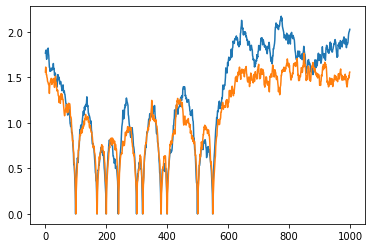

In [13]:
sim = grf.grf1D(cov_model_ref, nx, dx, ox, x=x, v=v, mean=np.mean(v), nreal=50, printInfo=False) # 2d-array of shape nreal x nx
sgs_mean = np.mean(sgs.val.reshape(50,-1), axis=0)
sgs_std = np.std(sgs.val.reshape(50,-1), axis=0)
sim_mean = np.mean(sim, axis=0)
sim_std = np.std(sim, axis=0)
dm = sgs_mean - sim_mean
ds = sgs_std - sim_std
print(np.mean(dm), np.mean(ds))
print(np.ptp(dm), np.ptp(ds))
plt.plot(sgs_std)
plt.plot(sim_std)

In [14]:
d1 = (vu - im.val[0].reshape(-1))
d2 = (vu_std - im.val[1].reshape(-1))
print(np.ptp(d1), np.mean(d1))
print(np.ptp(d2), np.mean(d2))


NameError: name 'vu' is not defined

### Simple kriging (comparison)
Assuming the data (variable) stationary and specifying a constant mean (computed on the data set), the simple kriging estimates and standard deviations can be computed using the function `simple_kriging` or the function `krige1D` (from `geone.grf` module, see jupyter notebook `ex_grf_1d`). Note that this latter may be faster and allows to specify a varying mean.

In [15]:
# Comparing results and computing time for simple kriging via function simple_kriging and krige1D
import time
t1 = time.time()
vu_sk_a, vu_sk_std_a = gcm.simple_kriging(x, v, xu, cov_model_opt, mean=np.mean(v))
t2 = time.time()
print('simple_kriging, elapsed time:', t2-t1)

t1 = time.time()
vu_sk, vu_sk_std = grf.krige1D(x, v, cov_model, nx, dx, ox, mean=np.mean(v), printInfo=False)
t2 = time.time()
print('grf.krige1D, elapsed time:', t2-t1)

diff_sk = vu_sk_a - vu_sk
diff_sk_std = vu_sk_std_a - vu_sk_std
print('Peak-to-peak of diff. for estimate:', np.ptp(diff_sk))
print('Peak-to-peak of diff. for st. dev.:', np.ptp(diff_sk_std))
print('Mean of diff. for estimate:', np.mean(diff_sk))
print('Mean of diff. for st. dev.:', np.mean(diff_sk_std))

NameError: name 'cov_model_opt' is not defined

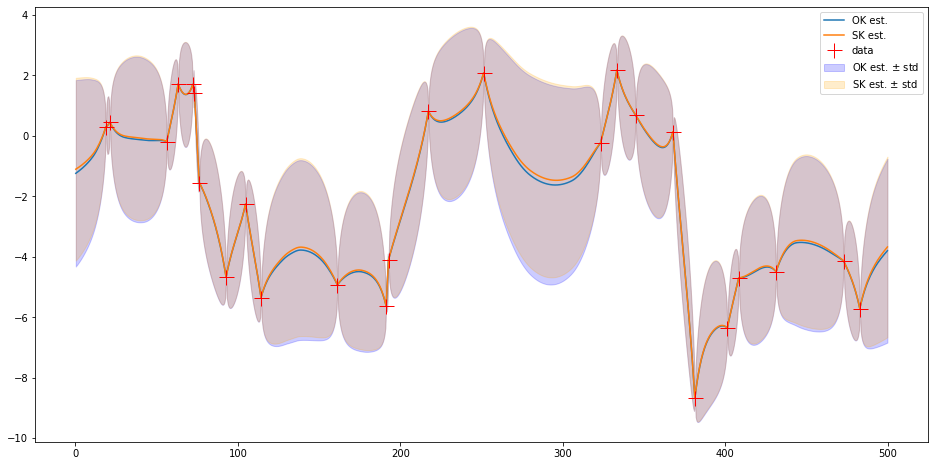

In [52]:
# already computed...
# vu_sk, vu_sk_std = grf.krige1D(x, v, cov_model_opt, nx, dx, ox, mean=np.mean(v), printInfo=False)

# Plot
plt.figure(figsize=(16,8))
plt.plot(xu, vu, label='OK est.')
plt.fill_between(xu, vu-vu_std, vu+vu_std, color='blue', alpha=0.2, label=r'OK est. $\pm$ std')
plt.plot(xu, vu_sk, label='SK est.')
plt.fill_between(xu, vu_sk-vu_sk_std, vu_sk+vu_sk_std, color='orange', alpha=0.2, label=r'SK est. $\pm$ std')
plt.plot(x, v, 'r+', markersize=15, label='data')
plt.legend()
plt.show()

### Conditional simulation using the function `grf1D`
Specifying the same mean, the function `grf1D` (from `geone.grf` module, see jupyter notebook `ex_grf_1d`) can be used to generate conditional realizations (based on simple kriging).

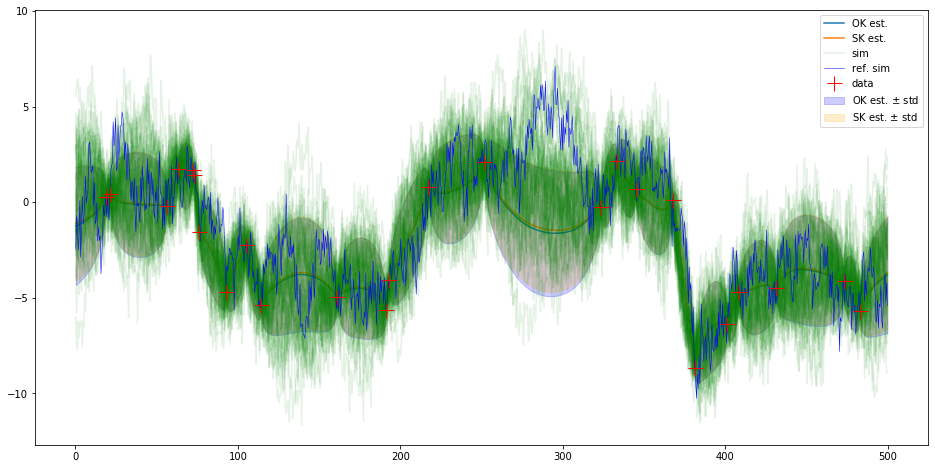

In [49]:
# Simulation
np.random.seed(293)
nreal = 50
sim = grf.grf1D(cov_model_ref, nx, dx, ox, x=x, v=v, nreal=nreal, mean=printInfo=False) # 2d-array of shape nreal x nx

# Plot
plt.figure(figsize=(16,8))
plt.plot(xu, vu, label='OK est.')
plt.fill_between(xu, vu-vu_std, vu+vu_std, color='blue', alpha=0.2, label=r'OK est. $\pm$ std')
plt.plot(xu, vu_sk, label='SK est.')
plt.fill_between(xu, vu_sk-vu_sk_std, vu_sk+vu_sk_std, color='orange', alpha=0.2, label=r'SK est. $\pm$ std')
for i in range(nreal):
    if i == 0:
        label = 'sim'
    else:
        label = None
    plt.plot(xu, sim[i], color='green', alpha=.1, label=label)
plt.plot(xu, ref[0], color='blue', lw=.5, label='ref. sim')
plt.plot(x, v, 'r+', markersize=15, label='data')
plt.legend()
plt.show()

In [96]:
ind = np.arange(10)
print(ind)
np.random.shuffle(ind)
print(ind)

[0 1 2 3 4 5 6 7 8 9]
[8 0 4 5 2 1 3 6 7 9]


In [98]:
cov_model_ref.__class__.__name__

'CovModel1D'

In [115]:
len(np.arange(20).reshape(4,5))

4

In [106]:
def f(x):
    return ()

a=f(np.array([1,2]))
type(a)

tuple

In [21]:
cov_model = gcm.CovModel2D(elem=[
    ('spherical', {'w':9.5, 'r':[5, 5]}), # elementary contribution (same ranges: isotropic)
    ('nugget', {'w':0.5})                     # elementary contribution
    ], alpha=0.0, name='ref model (isotropic)')


In [33]:
cov_model = gcm.CovModel2D(elem=[
    ('spherical', {'w':9.5, 'r':[5, 5]}), # elementary contribution (same ranges: isotropic)
    ('nugget', {'w':0.5})                     # elementary contribution
    ], alpha=0.0, name='ref model (isotropic)')

# Simulation grid (domain)
nx, ny = 10, 15  # number of cells
dx, dy = 1.0, 1.0  # cell unit
ox, oy = 0.0, 0.0  # origin


# Reference simulation
np.random.seed(123)
ref = grf.grf2D(cov_model, (nx, ny), (dx, dy), (ox, oy), nreal=1, printInfo=False) 
    # 3d-array of shape 1 x ny x nx
ref.shape
im_ref = img.Img(nx,ny,1,dx,dy,1,nv=1,val=ref,varname='val')
img.writeImageGslib( im_ref, 'zzz_im_ref.gslib')

In [22]:
# Extract n points from the reference simulation
n = 5 # number of data points
ind = np.random.choice(nx*ny, size=n, replace=False) # indexes of extracted grid cells
ix = ind%nx  # indexes along x-axis
iy = ind//nx # indexes along y-axis
xc = ox + (ix + 0.5)*dx # x-coordinates of data points (centers of the extracted grid cells)
yc = oy + (iy + 0.5)*dy # y-coordinates of data points (centers of the extracted grid cells)
#xc = ox + (ind + np.random.random(n))*dx # x-coordinates of data points (within the extracted grid cells)
#yc = oy + (ind + np.random.random(n))*dy # y-coordinates of data points (within the extracted grid cells)

x = np.array((xc, yc)).T # array of coordinates of data points (shape: n x 2)
v = ref[0].reshape(-1)[ind] # value at data points

array([-0.15851163, -1.44302022,  4.5151212 ,  0.96254367, -2.6835608 ])

In [224]:
exec(open('zzz_ebauche.py').read())
            
sgs2D(cov_model, dimension=(nx, ny), spacing=(dx, dy), origin=(ox, oy),
      search_radius=(2,2),
      nreal=1, x=x, v=v,mean=0, printInfo=True)

done


In [214]:
a=(12,24)
b=(3,6)
(np.array([0.,0.])+a)/b

array([4., 4.])

In [205]:
######
nreal=2
nx, ny = 10, 15  # number of cells
dx, dy = 1.0, 1.0  # cell unit
ox, oy = 0.0, 0.0  # origin
srx, sry = 2., 2.
nxy = nx*ny
x = np.array([[0.5 , 6.75],
        [4.5 , 4.75],
        [2.5 , 0.75],
        [3.5 , 4.75]])
v = np.array([-0.15851163, -1.44302022,  4.5151212 ,  0.96254367])
dimension = (nx, ny)
origin=(ox, oy)
spacing=(dx, dy)
search_radius = (srx, sry)
search_radius_int = np.asarray(np.floor(np.asarray(search_radius)/np.asarray(spacing)), dtype=int)
srxi, sryi = search_radius_int
tmp = np.arange(1, search_radius_int[0] + 1)**2 * (dx/srx)**2
search_mask_x = np.hstack((tmp[::-1], [0.], tmp))
tmp = np.arange(1, search_radius_int[1] + 1)**2 * (dy/sry)**2
search_mask_y = np.hstack((tmp[::-1], [0.], tmp))
search_mask_dist2 = np.sum(np.array(np.meshgrid(search_mask_y, search_mask_x, indexing='ij')), axis=0)
search_mask_dist2 
#indc = np.asarray(np.floor((x-origin)/spacing), dtype=int)
#indc

array([[2.  , 1.25, 1.  , 1.25, 2.  ],
       [1.25, 0.5 , 0.25, 0.5 , 1.25],
       [1.  , 0.25, 0.  , 0.25, 1.  ],
       [1.25, 0.5 , 0.25, 0.5 , 1.25],
       [2.  , 1.25, 1.  , 1.25, 2.  ]])

In [206]:
indc = np.asarray(np.floor((x-origin)/spacing), dtype=int) # multiple-indices: size n x 2
ix, iy = indc[:, 0], indc[:, 1]
if sum(ix < 0) or sum(ix >= nx):
    print('ERROR (SGS2D): a conditioning point is out of the grid (x-direction)')
if sum(iy < 0) or sum(iy >= ny):
    print('ERROR (SGS2D): a conditioning point is out of the grid (y-direction)')
if len(np.unique(ix + iy*nx)) != len(x):
    print('ERROR (GRF2D): more than one conditioning point in a same grid cell')
print(ix, iy, nx, ny)
ix = ix + srxi
iy = iy + sryi
sgs_cur[iy, ix] = v
[sgs_cur[iy[j], ix[j]]for j in range(len(v))], v
path = np.arange(nxy, dtype='int')
#np.random.shuffle(path)
path_iy = path // nx + sryi
path_ix = path % nx + srxi
path_ix, path_iy

[0 4 2 3] [6 4 0 4] 10 15


(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  2,  3,  4,  5,  6,  7,  8,
         9, 10, 11,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  2,  3,  4,  5,
         6,  7,  8,  9, 10, 11,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  2,
         3,  4,  5,  6,  7,  8,  9, 10, 11,  2,  3,  4,  5,  6,  7,  8,  9,
        10, 11,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  2,  3,  4,  5,  6,
         7,  8,  9, 10, 11,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  2,  3,
         4,  5,  6,  7,  8,  9, 10, 11,  2,  3,  4,  5,  6,  7,  8,  9, 10,
        11,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  2,  3,  4,  5,  6,  7,
         8,  9, 10, 11,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,
         3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
         5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
         7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,
         8,  8,  9,  9

In [148]:
ir = 0
sgs_cur = sgs[ir]
sgs_cur[indc] = v
sgs

array([[nan, 10., 20., nan, nan, nan, nan, nan, nan, nan, nan, nan, 30.,
        nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan]])

In [152]:
search_radius_int = np.asarray(np.floor(search_radius/spacing), dtype=int)
search_ellipsoid = np.zeros(2*search_radius_int + 1)
search_ellipsoid = (np.arange(2*search_radius_int + 1) - search_radius_int)*sx
search_ellipsoid

array([-3., -2., -1.,  0.,  1.,  2.,  3.])

In [179]:
np.array((np.arange(3), np.arange(3)))

array([[0, 1, 2],
       [0, 1, 2]])

In [140]:
cov_model_ref.r()

1.2

In [144]:
np.floor(np.array([1.3,-3.,-3.2, 4.]), dtype='int')


TypeError: No loop matching the specified signature and casting was found for ufunc floor